# ELM368 Dersi - Lab4 Çalışması
## Grup C11

#### Kütüphaneler vb.

In [42]:
import numpy as np                      
#mat. fonksiyonlarını kullanabilmek için gereken kütüphane.
import cmath as c                       
#complex sayılar için başka bir mat. kütüphanesi.
from matplotlib import pyplot as plt    
#plot (grafik çizdirme) fonksiyonlarını kullanmakak için gereken kütüphane.
from scipy import signal
#spicy kütüphanesini ekliyoruz
%matplotlib notebook
#düzgün grafik görüntülemek için gerekiyor.
from scipy.io.wavfile import read # Ses dosyasının okunması için gerekli kütüphane
from IPython.lib.display import Audio # Ses dosyasının dinlenmesi için gerekli kütüphane

from numpy import pi as pi 
from numpy import sin as sin 
from numpy import cos as cos

import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
from scipy.io import loadmat

import zplane
#pi sayısı, sin ve cos'u direkt pi, sin, cos olarak kullanmak için.

import warnings
warnings.simplefilter("ignore", np.ComplexWarning) 
#complex sayı hatalarını almamak için. ***
#*** bu işlem sonuçları etkilememektedir.

# Soru-2)

### a)

<IPython.core.display.Javascript object>


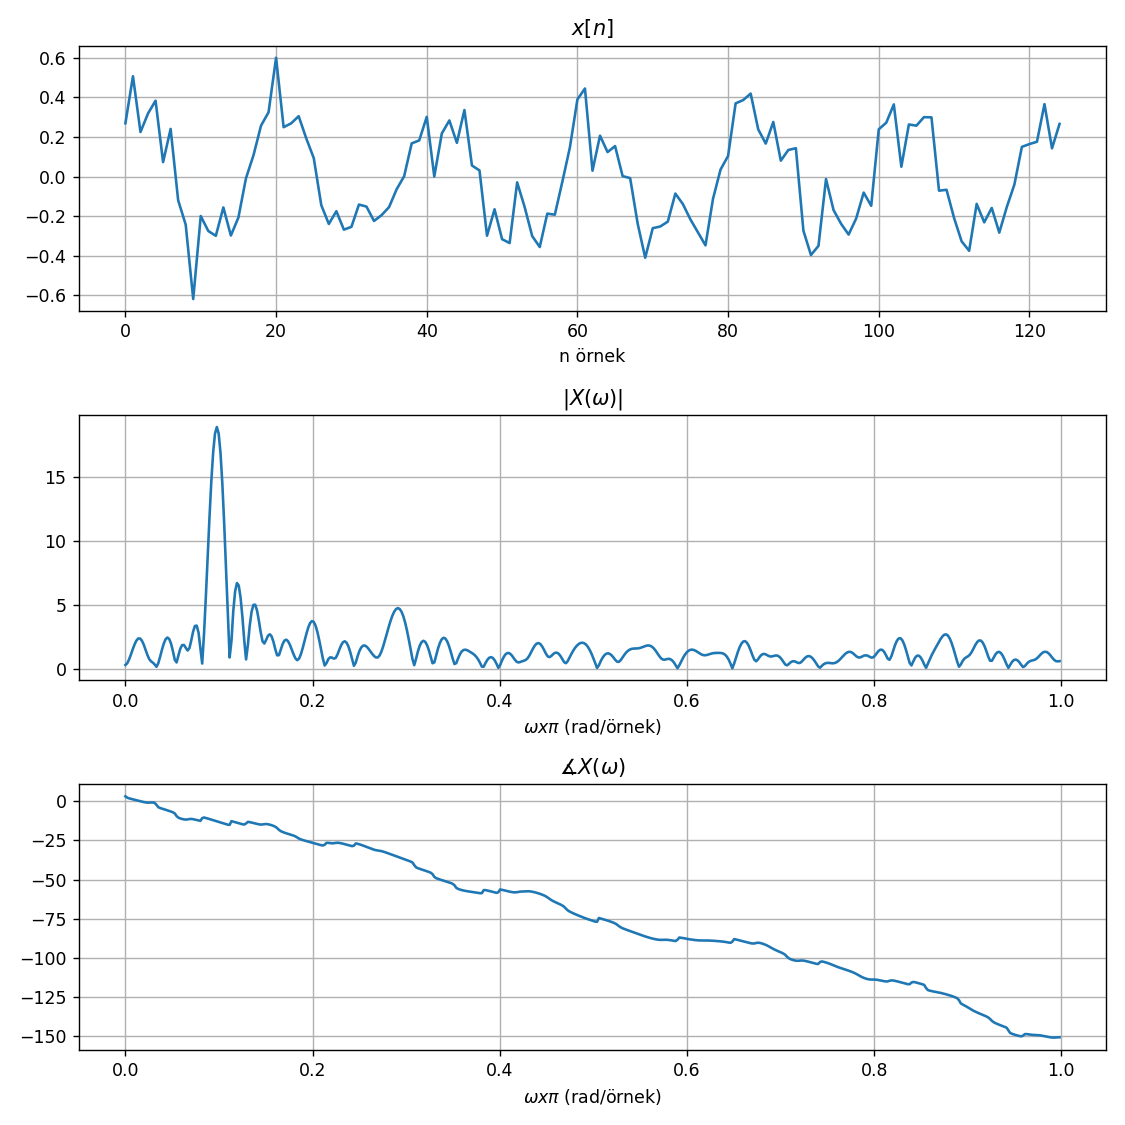

In [56]:
N = 125
Fs = 25
Ts = 1 / Fs
sensor_data = loadmat("sensor_data_c.mat")
x1 = sensor_data['x1'].astype(np.float)
x_b = x1[0,:]

w , X = sgnl.freqz(x_b) 

X_abs = np.abs(X)
X_pha = np.unwrap(np.angle(X))

n = np.arange(0,N,1)

plt.figure(figsize=(9,9))

plt.subplot(3,1,1)
plt.title("$x[n]$")
plt.xlabel("n örnek")
plt.plot(n,x_b)
plt.grid()

plt.subplot(3,1,2)
plt.title("$|X(\omega)|$")
plt.xlabel("$\omega x\pi$ (rad/örnek)")
plt.plot(w/pi,X_abs)
plt.grid()

plt.subplot(3,1,3)
plt.title("$\measuredangle X(\omega)$")
plt.xlabel("$\omega x\pi$ (rad/örnek)")
plt.plot(w/pi,X_pha)
plt.grid()

plt.show()
plt.tight_layout()


YORUM:
En belirgin frekans bileşeni 
0.1pi frekansı civarındadır.


Filtre tasarımı;
    
Frequency specs: F_pb = 0.05pi (w/2) , F_sb = 0.1pi 

Filter type: LPF, FIR - Equiripple

G : 0 dB

N : 100

<IPython.core.display.Javascript object>


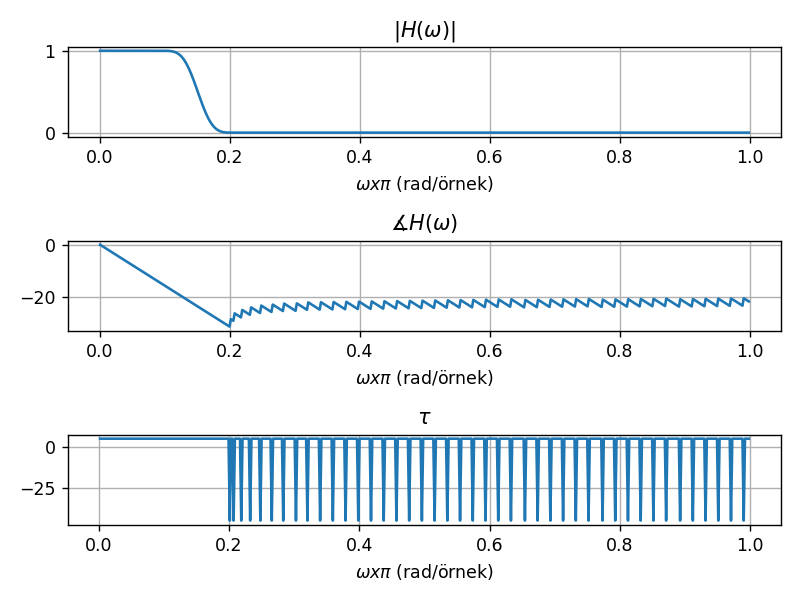

tau:  4.8828125


In [47]:
N = 100
Fs = 25
Ts = 1 / Fs
filtre_data = loadmat("Soru2_LPF.mat")
h = filtre_data['ba'].astype(np.float)
h_b = h[0,:]

w_h , H = sgnl.freqz(h_b) 

H_abs = np.abs(H)
H_pha = np.unwrap(np.angle(H))
tau_H = -np.diff(H_pha)*(N/(2*pi))

plt.figure(2)
plt.subplot(3,1,1)
plt.title("$|H(\omega)|$")
plt.xlabel("$\omega x\pi$ (rad/örnek)")
plt.plot(w_h/pi,H_abs)
plt.grid()

plt.subplot(3,1,2)
plt.title("$\measuredangle H(\omega)$")
plt.xlabel("$\omega x\pi$ (rad/örnek)")
plt.plot(w_h/pi,H_pha)
plt.grid()

plt.subplot(3,1,3)
plt.title("$\\tau$")
plt.xlabel("$\omega x\pi$ (rad/örnek)")
plt.plot(w_h[1::]/pi,tau_H)
plt.grid()

plt.show()
plt.tight_layout()

print("tau: ",abs(tau_H[0]))

YORUM:
x[n]'i frekans domaininde incelediğimizde baskın frekansın alçak frekansta olduğu ( 0.1pi civarında ) görülmüştür. Bu yüzden filtremizi alçak geçiren filtre olarak seçtik ve bu frekansları (0.1pi civarı) geçirmesini sağladık.

Filtre tasarımını yaparken, filtre tipi olarak FIR filtre seçtik; FIR filtre yapısı uygun koşullarda bize kararlılık, lineer faz ve sabit grup gecikmesini sağlıyor. 

Grafiklerden de lineer faza ve 4.88 (örnek) değerinde sabit bir grup gecikmesine sahip olduğumuzu görebiliyoruz.
 

### b)

<IPython.core.display.Javascript object>


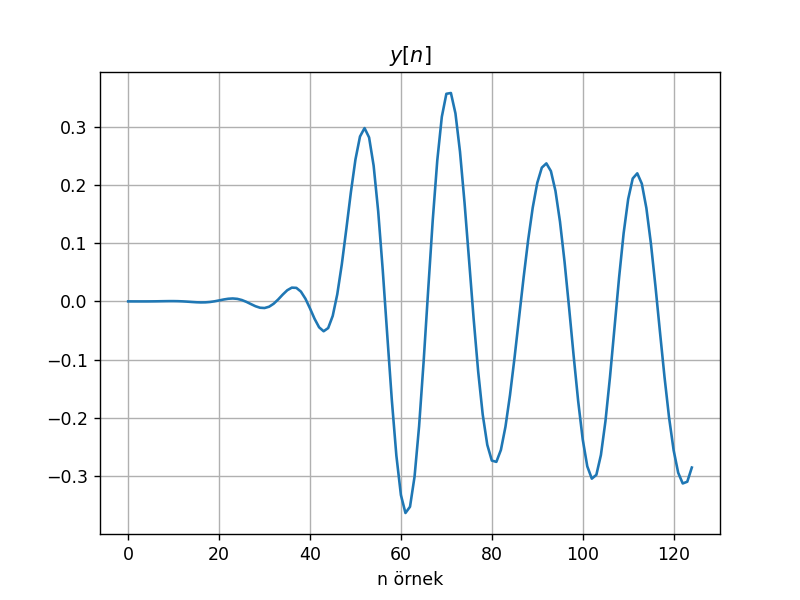

In [49]:

n = np.arange(0,125,1)
y = sgnl.lfilter(h_b, 1, x_n)

plt.figure(3)
plt.title("$y[n]$")
plt.xlabel("n örnek")
plt.plot(n,y)
plt.grid()

plt.show()

YORUM: 

Giriş işareti ile çıkışı karşılaştırırsak sinyal üzerindeki gürültülerin belirgin bir şekilde azaldığını görüyoruz. 
Sinyal, çıkışta tau 4.88 örnek değerince gecikmiştir. Sinyalin filtrelenen yerleri sönümlenmiş, sönümlenmeyen yerlerde ufak bir genlik düşüşü olmuştur.
Bu problem sonucunda sensör verisini filtreleyerek gürültüsüz verinin nasıl elde edilebileceğini öğrenmiş olduk.
